<a href="https://colab.research.google.com/github/riyamendon99/CSE575-SML-Riya-Mendon/blob/main/HW2_1_(CrossValidation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Name: Riya Mendon ASU ID: 1229584722***

Following is the code taken from the scikit-learn website (https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html)

[2pt] The author claims that the alpha value (0.001) is chosen by running the cross validation using LassoCV. Your task is to validate the claim by writing the code for performing LassoCV (from scikit-learn). Construct a set containing at least 5 candiate alpha values (of course, including 0.001) and perform LassoCV. Check whether LassoCV gives 0.001.

In [ ]:
%matplotlib inline


# Compressive sensing: tomography reconstruction with L1 prior (Lasso) [2pt]

This example shows the reconstruction of an image from a set of parallel
projections, acquired along different angles. Such a dataset is acquired in
**computed tomography** (CT).

Without any prior information on the sample, the number of projections
required to reconstruct the image is of the order of the linear size
``l`` of the image (in pixels). For simplicity we consider here a sparse
image, where only pixels on the boundary of objects have a non-zero
value. Such data could correspond for example to a cellular material.
Note however that most images are sparse in a different basis, such as
the Haar wavelets. Only ``l/7`` projections are acquired, therefore it is
necessary to use prior information available on the sample (its
sparsity): this is an example of **compressive sensing**.

The tomography projection operation is a linear transformation. In
addition to the data-fidelity term corresponding to a linear regression,
we penalize the L1 norm of the image to account for its sparsity. The
resulting optimization problem is called the `lasso`. We use the
class :class:`~sklearn.linear_model.Lasso`, that uses the coordinate descent
algorithm. Importantly, this implementation is more computationally efficient
on a sparse matrix, than the projection operator used here.

The reconstruction with L1 penalization gives a result with zero error
(all pixels are successfully labeled with 0 or 1), even if noise was
added to the projections. In comparison, an L2 penalization
(:class:`~sklearn.linear_model.Ridge`) produces a large number of labeling
errors for the pixels. Important artifacts are observed on the
reconstructed image, contrary to the L1 penalization. Note in particular
the circular artifact separating the pixels in the corners, that have
contributed to fewer projections than the central disk.


Automatically created module for IPython interactive environment


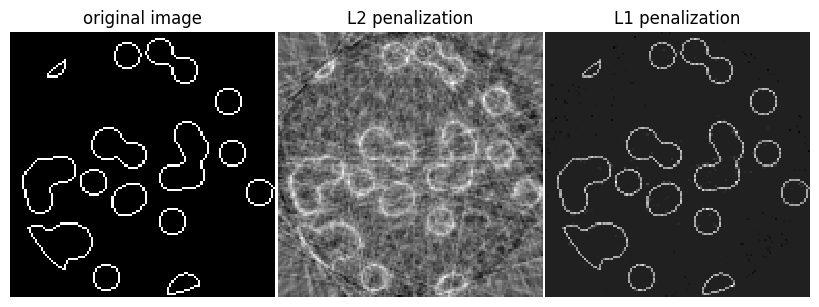

In [ ]:
print(__doc__)

# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator @ data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

***Answer to Question 1 below:***

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
import numpy as np

#Constructing a set of 5 alpha values for performing LassoCV
generate_alpha = np.logspace(np.log10(0.001), np.log10(0.1), 5)
print("5 Values of Alpha are ", generate_alpha)

#Setting up the model to find the Best Alpha
lasso_regression_cv = LassoCV(cv=4, random_state=0, alphas=generate_alpha)
lasso_regression_cv.fit(proj_operator,proj.ravel())

print("Intercept ", lasso_regression_cv.intercept_)
print("Coefficients ", lasso_regression_cv.coef_)
print("The Best Alpha value is ", lasso_regression_cv.alpha_)

5 Values of Alpha are  [0.001      0.00316228 0.01       0.03162278 0.1       ]
Intercept  0.6131884758368447
Coefficients  [-0. -0. -0. ... -0. -0. -0.]
The Best Alpha value is  0.001
